<a href="https://colab.research.google.com/github/saisushantht/Classification-Data--Apples-Oranges/blob/master/Classification_Data_Apples_%26_Oranges_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

Loading the dataset from Github repo.


In [2]:
dataset_url='https://raw.githubusercontent.com/saisushantht/Classification-Data--Apples-Oranges/master/datasets_632612_1125338_apples_and_oranges.csv'
df=pd.read_csv(dataset_url)

In [3]:
df.head()    # to view the first five rows of dataframe

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [4]:
df.info()   #to view the summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


Form the above  summary of the dataFrame we can conform that there are no 
NULL values


Importing matplotlib.pyplot for ploting.
%matplotlib inline to set the inline backend 

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0, 0.5, 'Size')

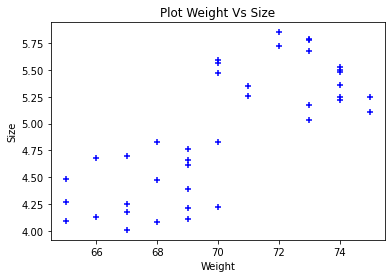

In [6]:
plt.scatter(df['Weight'],df['Size'],color="b",marker='+')     # to create scatter plot .
plt.title("Plot Weight Vs Size")
plt.xlabel("Weight")
plt.ylabel("Size")

To understand model performance, dividing the dataset into a training set and a test set is done.
by using function train_test_split()

In [19]:
from sklearn.model_selection import train_test_split
df = df.sample(frac = 1)        #to shuffle the dataframe

X=df.drop(['Class'],axis='columns')                            # for features 
Y=df.drop(['Weight','Size'],axis='columns')               # for labels

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)      #dividing in train(70%) and test(30%)
print("shape of X_train = ",X_train.shape)
print("shape of Y_train = ",Y_train.shape)
print("shape of X_test  = ",X_test.shape)
print("shape of Y_test  = ",Y_test.shape)

shape of X_train =  (28, 2)
shape of Y_train =  (28, 1)
shape of X_test  =  (12, 2)
shape of Y_test  =  (12, 1)


In sklearn, all machine learning models are implemented as Python classes

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression                                   # import the class
from sklearn.metrics import classification_report, confusion_matrix

Instantiate the model (using the default parameters)

In [21]:
model = LogisticRegression()

fit the model with data

In [22]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

predict_proba gives the probabilities for the target in array form.

In [23]:
model.predict_proba(X_test)

array([[2.45798807e-01, 7.54201193e-01],
       [2.37468712e-01, 7.62531288e-01],
       [9.95876897e-01, 4.12310340e-03],
       [6.11497171e-01, 3.88502829e-01],
       [6.61623173e-04, 9.99338377e-01],
       [1.77949440e-01, 8.22050560e-01],
       [9.85534283e-01, 1.44657175e-02],
       [9.98482169e-01, 1.51783100e-03],
       [9.12663478e-01, 8.73365222e-02],
       [4.74765297e-01, 5.25234703e-01],
       [9.42953538e-04, 9.99057046e-01],
       [9.96267857e-01, 3.73214290e-03]])

We can predict the class for new data instances using our finalized classification model in scikit-learn using the predict() function.

In [24]:
Y_pred=model.predict(X_test)                    
Y_pred

array(['orange', 'orange', 'apple', 'apple', 'orange', 'orange', 'apple',
       'apple', 'apple', 'orange', 'orange', 'apple'], dtype=object)

In [25]:
model.score(X_test, Y_test)   # to know the accuracy

0.9166666666666666

visualizing the results of the model in the form of a confusion matrix 

In [26]:
confusion_matrix(Y_test, Y_pred)        #creating Confusion matrix

array([[5, 0],
       [1, 6]])

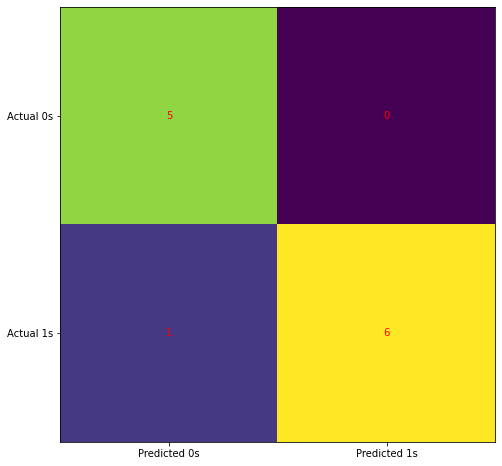

In [27]:
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [28]:


model.predict([[74,5.3]])

array(['apple'], dtype=object)

In [29]:
model.predict([[62,3.0]])

array(['orange'], dtype=object)

In [30]:
print(classification_report(Y_test, Y_pred))    #to show the main classification metrics.

              precision    recall  f1-score   support

       apple       0.83      1.00      0.91         5
      orange       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



In [32]:
print("Accuracy =",model.score(X_test,Y_test))

Accuracy = 0.9166666666666666
